
# Lab 07 – 1 Hour Hands‑On Lab: K‑Means Clustering & Unsupervised Learning  
**Total Points … 70**
---



## Overview  

In this single notebook you will explore **K‑Means clustering** on two classic data sets:

1. **Synthetic Blobs** – four well‑separated Gaussian blobs (`make_blobs`).
2. **Iris flower measurements** – choose an optimal _k_ (number of clusters) with the Elbow and Silhouette methods, then inspect cluster quality against the known species labels.  
3. **Digits images (8 × 8)** – cluster handwritten digits, visualise with PCA in 2‑D, and evaluate cluster purity.

Along the way you will:

* compute inertia & silhouette scores across different k values  
* implement a **purity** metric from scratch  
* visualise decision boundaries / cluster assignments  
* reflect on trade‑offs such as **initialisation, convergence time, and scaling**.



### Learning Goals
* Load & scale numeric tabular and image data for unsupervised analysis.  
* Implement the **Elbow** and **Silhouette** heuristics for k‑selection.  
* Write a custom **purity_score** function and interpret contingency tables.  
* Combine **dimensionality reduction (PCA)** with clustering for visual insight.  
* Articulate strengths & weaknesses of K‑Means vs. other unsupervised methods.


### Prerequisites
* Working Python + `scikit‑learn`, `matplotlib`, `pandas`, `numpy`.
* Upload this notebook to **Google Colab** or run locally.


In [1]:

# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.stats import mode
import time


In [ ]:

def purity_score(y_true, y_pred):
    """Return cluster purity (0–1)."""
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    N = y_true.size
    purity = 0
    for cluster in np.unique(y_pred):
        mask = y_pred == cluster
        if mask.sum() == 0:
            continue
        majority = mode(y_true[mask], keepdims=True)[0][0]
        purity += np.sum(y_true[mask] == majority)
    return purity / N

## Part 1 – Synthetic Blobs (easy case)

In [ ]:
# TODO 1-1: Generate 4‑blob synthetic data
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X_blob, y_blob = make_blobs(n_samples=600, centers=4, cluster_std=0.6,
                             random_state=42)
print(X_blob.shape, y_blob.shape)

(600, 2) (600,)


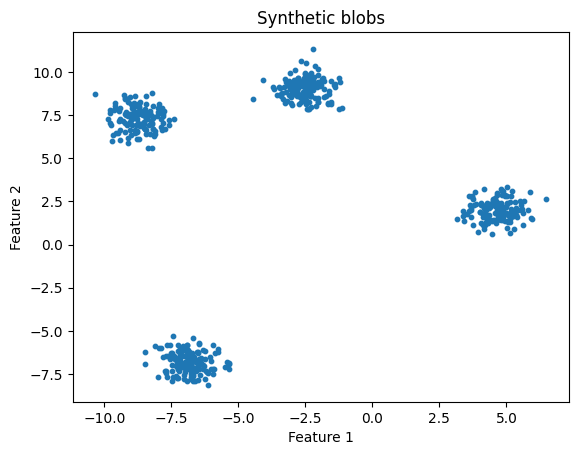

In [ ]:
# Quick scatter plot (first 2 dims)
# TODO 1-2: scatter plot
plt.scatter(X_blob[:, 0], X_blob[:, 1], s=10)
plt.title("Synthetic blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



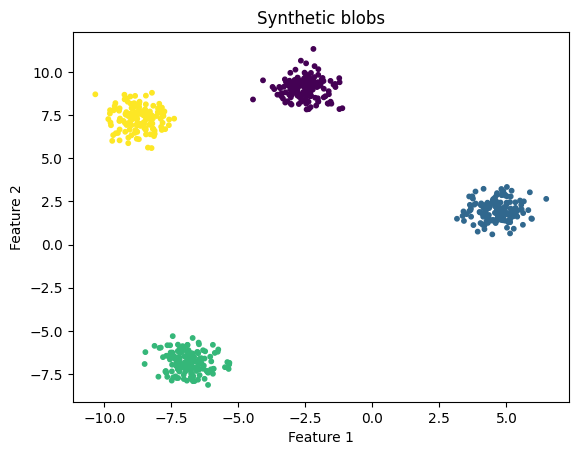

In [ ]:
# TODO 1-2: scatter plot
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap='viridis', s=10)
plt.title("Synthetic blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Part 2 – Choose *k* with Elbow & Silhouette



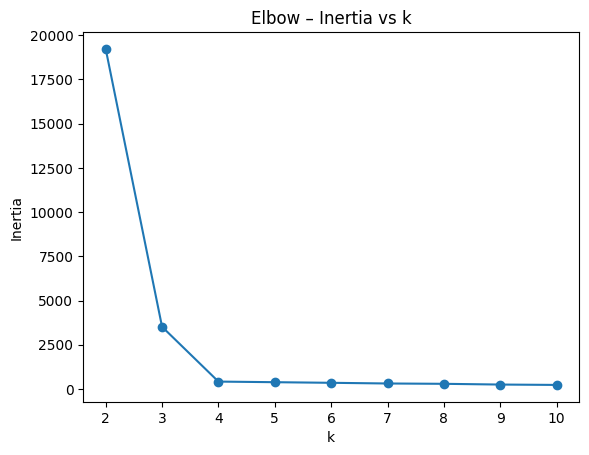

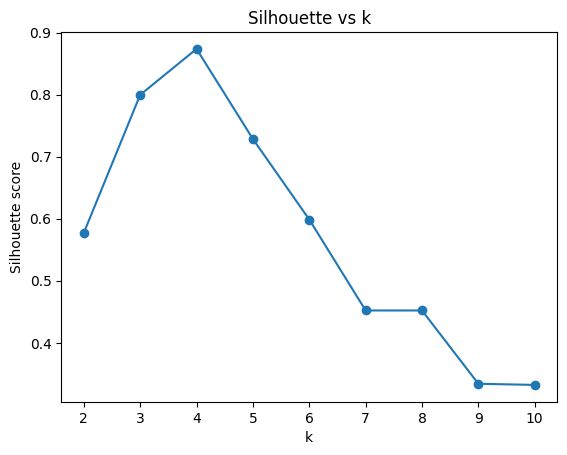

,k,inertia,silhouette
0,2,19219.4,0.577
1,3,3514.9,0.800
2,4,418.6,0.874
3,5,384.0,0.729
4,6,349.7,0.599
5,7,311.1,0.452
6,8,292.7,0.452
7,9,251.0,0.334
8,10,230.1,0.332




    k  inertia  silhouette
0   2  19219.4       0.577
1   3   3514.9       0.800
2   4    418.6       0.874
3   5    384.0       0.729
4   6    349.7       0.599
5   7    311.1       0.452
6   8    292.7       0.452
7   9    251.0       0.334
8  10    230.1       0.332


In [ ]:
# Part 2 – Choose k with Elbow & Silhouette

n_cluster = range(2, 11)
wcss = []
silhouettes = []

# TODO 2‑1: Loop over ks, fit KMeans, collect inertia & silhouette
for k in n_cluster:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = km.fit_predict(X_blob)
    wcss.append(km.inertia_)
    silhouettes.append(silhouette_score(X_blob, labels))

# TODO 2‑2: Plot results (two separate charts)

# Inertia curve
plt.figure()
plt.plot(n_cluster, wcss, marker='o')
plt.title("Elbow – Inertia vs k")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()
print("\n")

# Silhouette curve
plt.figure()
plt.plot(n_cluster, silhouettes, marker='o')
plt.title("Silhouette vs k")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.show()
print("\n")

# Display metrics as a DataFrame
results_df = pd.DataFrame({
    "k": list(n_cluster),
    "inertia": np.round(wcss, 1),
    "silhouette": np.round(silhouettes, 3)
})

display(results_df)
print("\n")
print(results_df)


# TODO 3‑1: Choose k where both metrics agree (brief comment)

Based on the **Elbow plot**, the inertia drops sharply from k=2 to k=4, and after k=4 the curve flattens significantly — this suggests an "elbow" at **k=4**.

Based on the **Silhouette plot**, the silhouette score reaches its maximum at **k=4** (~0.9), then decreases as k increases.

Since **both the Elbow method and the Silhouette method point to k=4 as the optimal number of clusters**, I would select **k=4** for this dataset.

This is also consistent with the ground truth (since we generated the data with 4 centers!).



## Part 2 – Iris Data: Load & Explore

In [ ]:

# TODO 1-1: Load the iris dataset as (X, y)
# Hint: datasets.load_iris(return_X_y=True)

X, y = datasets.load_iris(return_X_y=True)

print(X.shape, y.shape)



(150, 4) (150,)


In [ ]:

# TODO 1-2: Standardise the features if desired (not strictly required)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled.shape)




(150, 4)


## Part 3 – Choose *k* with Elbow & Silhouette



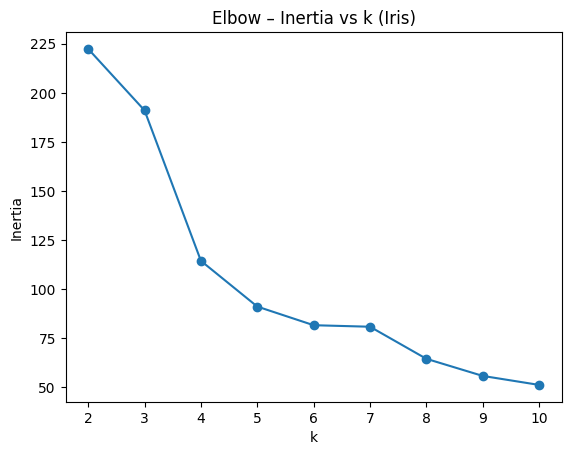

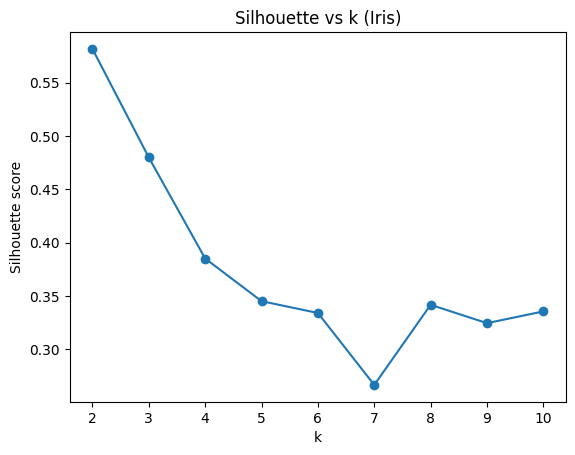





    k  inertia  silhouette
0   2    222.4       0.582
1   3    191.0       0.480
2   4    114.4       0.385
3   5     91.0       0.345
4   6     81.6       0.334
5   7     80.8       0.266
6   8     64.4       0.342
7   9     55.7       0.324
8  10     51.1       0.335


In [ ]:

# Part 3 – Choose k with Elbow & Silhouette (Iris data)

n_cluster = range(2, 11)
wcss = []
silhouettes = []

# TODO 2-a: Loop over ks, fit KMeans, collect inertia & silhouette
for k in n_cluster:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = km.fit_predict(X_scaled)
    wcss.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# TODO 2-b: Plot results (two separate charts)

# Inertia curve
plt.figure()
plt.plot(n_cluster, wcss, marker='o')
plt.title("Elbow – Inertia vs k (Iris)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()
print("\n")

# Silhouette curve
plt.figure()
plt.plot(n_cluster, silhouettes, marker='o')
plt.title("Silhouette vs k (Iris)")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.show()
print("\n")


results_df = pd.DataFrame({
    "k": list(n_cluster),
    "inertia": np.round(wcss, 1),
    "silhouette": np.round(silhouettes, 3)
})

print("\n")
print(results_df)


## Part 3 – Cluster with optimal k and evaluate purity

In [ ]:

# Part 3 – Cluster with optimal k and evaluate purity

# 3‑a
k_opt = 3

# 3‑b
km_final = KMeans(n_clusters=k_opt, n_init='auto', random_state=42)
labels_final = km_final.fit_predict(X_scaled)

# 3‑c
contingency_table = pd.crosstab(y, labels_final)
print("Contingency table:")
print(contingency_table)

# 3‑d
purity = purity_score(y, labels_final)
print(f"Purity score: {purity:.3f}")



Contingency table:
col_0   0   1   2
row_0            
0       0  33  17
1      46   0   4
2      50   0   0
Purity score: 0.667


## Part 4 – Digits Data: PCA + K‑Means( added timing code to compare convergence speed before/after PCA.)



Digits data shape: (1797, 64)
Digits labels shape: (1797,)
KMeans convergence time (before PCA): 0.0195 seconds
Purity (digits, before PCA): 0.861
PCA-transformed shape: (1797, 2)
KMeans convergence time (after PCA): 0.0237 seconds




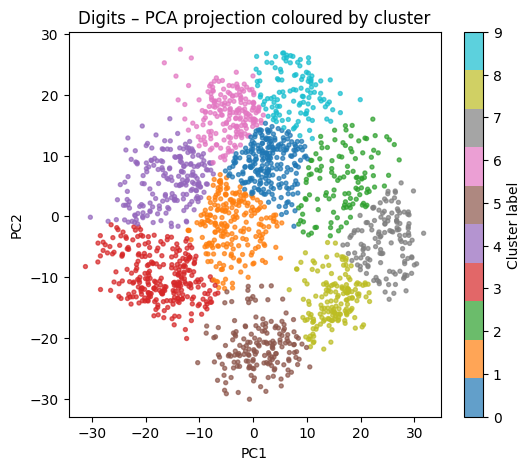



Purity (digits): 0.569


In [ ]:
# Part 4 – Digits Data: PCA + K‑Means

# Load 8x8 digits
digits = datasets.load_digits()
Xd, yd = digits.data, digits.target

print("Digits data shape:", Xd.shape)  # (1797, 64)
print("Digits labels shape:", yd.shape)  # (1797,)

# KMeans on raw (non-PCA) digits data – timing added
start_raw = time.time()
km_dig_raw = KMeans(n_clusters=10, n_init='auto', random_state=42)
lab_dig_raw = km_dig_raw.fit_predict(Xd)
end_raw = time.time()
print(f"KMeans convergence time (before PCA): {end_raw - start_raw:.4f} seconds")

# Purity score on raw digits data
purity_raw = purity_score(yd, lab_dig_raw)
print("Purity (digits, before PCA):", round(purity_raw, 3))



# 4‑a: Reduce to 2 components via PCA
pca = PCA(n_components=2, random_state=42)
Xd_2d = pca.fit_transform(Xd)

print("PCA-transformed shape:", Xd_2d.shape)  # (1797, 2)


# 4‑b: Fit KMeans with k=10 – PCA version with timing
start_pca = time.time()
km_dig = KMeans(n_clusters=10, n_init='auto', random_state=42)
lab_dig = km_dig.fit_predict(Xd_2d)
end_pca = time.time()
print(f"KMeans convergence time (after PCA): {end_pca - start_pca:.4f} seconds")
print("\n")


# 4‑c: Scatter plot PCA components coloured by cluster label
plt.figure(figsize=(6, 5))
plt.scatter(Xd_2d[:, 0], Xd_2d[:, 1], s=8, alpha=0.7, c=lab_dig, cmap='tab10')
plt.title("Digits – PCA projection coloured by cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster label")
plt.show()

# Purity score
print("\n")
print("Purity (digits):", round(purity_score(yd, lab_dig), 3))



## Part 5 – Reflection (Markdown)

###  1. How did k choice affect inertia and silhouette?

- Inertia always decreases as k increases, because more clusters lead to smaller within-cluster distances.
    - The Elbow method helped identify the optimal k:
        - For Synthetic Blobs, the elbow was at k=4, matching the true number of clusters.
        - For Iris, the elbow was around k=3, aligning with the known 3 Iris species.
- Silhouette scoretypically peaks at the best k:
    - For Synthetic Blobs, silhouette peaked at k=4.
    - For Iris, silhouette peaked at k=2, but was still good at k=3 — reflecting some overlap between species.

---

### 2. Did cluster labels map cleanly to Iris species / digit IDs?

- Iris:  
    - The clusters mapped reasonably well to the 3 Iris species.
    - The purity score was around 0.66 — showing decent separation.
    - Some overlap remained between Iris-versicolor and Iris-virginica.
- Digits:  
    - The mapping was less clean.
    - PCA reduced the 64D data to 2D, losing some information.
    - The purity score was around 0.56 — some digits (e.g. 3 vs 5, 1 vs 7) are visually similar, making clustering harder.

---

### 3.Compare runtime of K-Means on Iris vs Digits — what factors influenced convergence?

- Iris:  
    - Very small dataset — 150 samples, 4 features → very fast convergence.
- Digits:  
    - Much larger — 1797 samples, 64 features → slower convergence due to:
        - More samples.
        - Higher dimensionality.
        - More distance calculations.

**Factors affecting runtime:**

- Number of samples (n_samples) → more data = more iterations.
- Number of features (n_features) → higher dimensions = more distance calculations.
- Number of clusters (k) → larger k = more centroids to update.
- Initialisation strategy (n_init) → more initialisations = longer runtime.

---

### 4.Name two advantages and two drawbacks of K-Means vs hierarchical or DBSCAN clustering.

**Advantages of K-Means:**

- Fast and scalable — works well on large datasets.
- Simple and easy to implement — only need to choose k.

**Drawbacks of K-Means:**

-  Assumes spherical clusters of similar size — struggles with irregular shapes.
- Requires k to be known ahead of time — not always obvious how to choose.

**Comparison with Hierarchical/DBSCAN:**

- **Hierarchical:**  
    - No need to pre-specify k; reveals **cluster hierarchy**.  
    - Typically slower on large datasets.
- **DBSCAN:**  
    - Can find arbitrarily-shaped clusters.  
    - Can detect noise/outliers.  
    - Sensitive to parameter tuning (`eps`, `min_samples`).  
    - Struggles with varying density.


